## Ex. 

- Write a function called BiasPmf that takes a Pmf representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new Pmf representing the distribution of runners’ speeds as seen by the observer.

- To test your function, get the distribution of speeds from a normal road race (not a relay). I wrote a program that reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to MPH. Download it from http://thinkstats.com/relay.py. Run it and look at the PMF of speeds.

- Now compute the distribution of speeds you would observe if you ran a relay race at 7.5 MPH with this group of runners. You can download a solution from http://thinkstats.com/relay_soln.py

In [ ]:
import relay
import relay_soln
import csv
import Pmf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

## 1. BiasPmf():
- Input ==> distribution of runners' speeds, speed of the running observer .. 
- Output ==> a new Pmf (the distribution of runners’ speeds as seen by the observer) ..

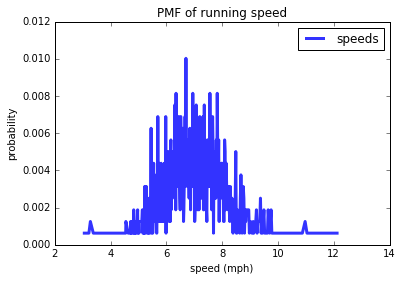

In [2]:
relay.main()  ## it gave me an error, however, it is mandate to output the graph and compare it with mine

The output of calling the main is a distribution of the speeds .. 

Let's implemnting our own function and test the results .. 

In [32]:
res = relay.ReadResults() ## read the results from the competition URL and returns them in tuples .. 

In [34]:
## write data in csv file .. 
## this reading is related to Julia's implementation 
with open('results.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(res)

In [5]:
speeds = relay.GetSpeeds(res) ## these are the speeds in MPH

In [6]:
## let's compute the pmf for the above speeds .. considering the speeds as our target list .. 

pmf = Pmf.MakePmfFromList(speeds, 'speeds')
# pmf.d ## dictionary of pmf

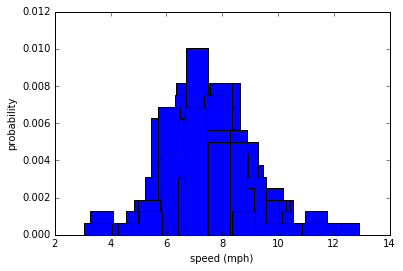

In [7]:
## now let's plot this dict .. using bar plot as these are discerete values ..

plt.bar(pmf.d.keys(), pmf.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

## Comment:

- The shape is a little bit weird becuase the number of data points are huge .. 

- The distribution of the output speeds is similar to that one from calling the main() .. 

- It is almost normal .. So far this is the distribution of the overall speeds .. 


==> Let's construct the biasPmf function .. 



In [8]:
def Norm_(vec):
        fraction = 1.0
        total = sum(vec)

        if total == 0.0:
            raise ValueError('total probability is zero.')
            return
        
        factor = float(fraction) / total
        
        for x in pmf.d.values():
            pmf.d.values()[x] *= factor
        return pmf.d.values()

In [9]:
def BiasPmf(pmf, runner_speed):
    k_ = []
    v_ = []
    vec = []
    index = pmf.d.keys()
    vals = pmf.d.values()
    
# The chance of observing a runner is proportional to the difference in speed.
    
    for i, j in pmf.Items():
        diff = abs(i - runner_speed) # vector of difference
        diff
#         Norm_(i*diff)

In [10]:
runner_speed = np.random.choice(pmf.d.keys())

norm_pmf = BiasPmf(pmf, runner_speed)
# norm_pmf

In [11]:
plt.bar(norm_pmf.keys(), norm_pmf.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

AttributeError: 'NoneType' object has no attribute 'keys'

The shape of the speed of runners as observed by the chosen runner might have different distribution than the normal one for the base case..  

Let's compare the results by calling relay_solution .. 

In [ ]:
biase_ = relay_soln.BiasPmf(pmf, runner_speed)
# biase_.Items()

In [ ]:
plt.bar(baise_.d.keys(), baise_.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

## 2. Distribution of speeds (wrt 7.5 MPH):

In [ ]:
biase_7 = relay_soln.BiasPmf(pmf, 7.5)
# biase_7.d

In [ ]:
plt.bar(biase_7.d.keys(),biase_7.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

In [ ]:
relay_soln.main()